# ALY6140 : Capstone Project

## Group 1 : Srinidheesh Ranganathan, Yashwanth Balan Arumugam, Li-Ying Wang (Ellie)


### Import Dataset

In [90]:
import Capstone_Group1_Utility as utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [91]:
df = utility.read_csv('NYPD_SQF.csv')
df

,year,pct,sex,race,stopped,arrested,frisked,searched,summoned,contrabn,...,cs_bulge,rf_vcrim,rf_othsw,rf_attir,rf_vcact,rf_rfcmp,rf_verbl,rf_knowl,rf_furtv,rf_bulge
0,2003,1.0,F,A,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003,1.0,F,B,11.0,2.0,2.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,1.0,F,I,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,1.0,F,P,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003,1.0,F,Q,6.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,2015,123.0,M,B,21.0,5.0,10.0,2.0,1.0,0.0,...,1.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0
12008,2015,123.0,M,I,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12009,2015,123.0,M,P,4.0,2.0,3.0,3.0,0.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
12010,2015,123.0,M,Q,11.0,2.0,6.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0


### Exploring Dataset

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12012 entries, 0 to 12011
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      12012 non-null  int64  
 1   pct       12012 non-null  float64
 2   sex       12012 non-null  object 
 3   race      12012 non-null  object 
 4   stopped   12012 non-null  float64
 5   arrested  12012 non-null  float64
 6   frisked   12012 non-null  float64
 7   searched  12012 non-null  float64
 8   summoned  12012 non-null  float64
 9   contrabn  12012 non-null  float64
 10  weapnfnd  12012 non-null  float64
 11  pf_weapn  12012 non-null  float64
 12  pf_hcuff  12012 non-null  float64
 13  cs_objcs  12012 non-null  float64
 14  cs_descr  12012 non-null  float64
 15  cs_casng  12012 non-null  float64
 16  cs_lkout  12012 non-null  float64
 17  cs_cloth  12012 non-null  float64
 18  cs_drgtr  12012 non-null  float64
 19  cs_furtv  12012 non-null  float64
 20  cs_vcrim  12012 non-null  fl

In [93]:
df.describe()

,year,pct,stopped,arrested,frisked,searched,summoned,contrabn,weapnfnd,pf_weapn,...,cs_bulge,rf_vcrim,rf_othsw,rf_attir,rf_vcact,rf_rfcmp,rf_verbl,rf_knowl,rf_furtv,rf_bulge
count,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,...,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000
mean,2009.000000,63.324675,399.045704,24.379953,209.172494,34.178072,24.591409,7.447552,4.877789,2.566767,...,35.151349,45.831918,29.024143,28.630703,29.961205,34.973360,2.289627,5.811522,135.161755,33.286380
std,3.741813,35.884580,1255.469361,65.523955,720.515918,101.784960,92.785725,21.408204,14.988288,7.444270,...,168.566262,173.462121,116.312854,108.910209,122.909626,128.888632,8.939437,24.490919,500.632105,152.608926
min,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,32.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2009.000000,66.000000,41.000000,3.000000,13.000000,3.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,7.000000,1.000000
75%,2012.000000,100.000000,217.000000,16.000000,90.000000,19.000000,12.000000,5.000000,3.000000,2.000000,...,11.000000,18.000000,15.000000,10.000000,12.000000,15.000000,1.000000,2.000000,50.000000,11.000000
max,2015.000000,123.000000,22972.000000,926.000000,13593.000000,1828.000000,2071.000000,364.000000,264.000000,98.000000,...,4653.000000,4044.000000,4125.000000,2414.000000,3251.000000,2973.000000,231.000000,886.000000,10662.000000,3597.000000


In [94]:
df['race'].unique()

array(['A', 'B', 'I', 'P', 'Q', 'W'], dtype=object)

In [95]:
df['year'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int64)

### Data Engineering

In [96]:
c_df1 = copy.deepcopy(df)
c_df1["totalnumsfincd"] = c_df1["stopped"]+c_df1["arrested"]+c_df1["frisked"]+c_df1["searched"]
+c_df1["summoned"]+c_df1["contrabn"]+c_df1["weapnfnd"]
c_df1.head()

,year,pct,sex,race,stopped,arrested,frisked,searched,summoned,contrabn,...,rf_vcrim,rf_othsw,rf_attir,rf_vcact,rf_rfcmp,rf_verbl,rf_knowl,rf_furtv,rf_bulge,totalnumsfincd
0,2003,1.0,F,A,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2003,1.0,F,B,11.0,2.0,2.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2,2003,1.0,F,I,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,1.0,F,P,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2003,1.0,F,Q,6.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total Number of Stop-and-Frisk Indicent in thousand')]

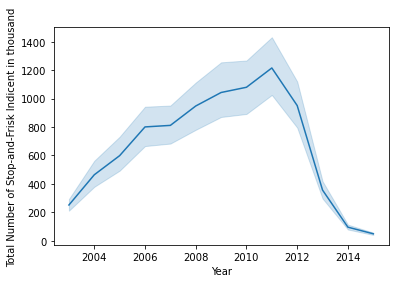

In [97]:
pic1 = sns.lineplot(x='year',y='totalnumsfincd',data=c_df1)
pic1.set(xlabel="Year", ylabel = "Total Number of Stop-and-Frisk Indicent in thousand")

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Total Number of Stop-and-Frisk Indicent')]

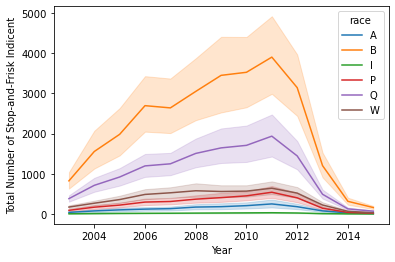

In [98]:
pic4 = sns.lineplot(x='year',y='totalnumsfincd', hue='race',data=c_df1)
pic4.set(xlabel="Year", ylabel = "Total Number of Stop-and-Frisk Indicent")

[Text(0.5, 0, 'Weapnon Drawn or Pointed at Suspects in thousands'),
 Text(0, 0.5, 'Race')]

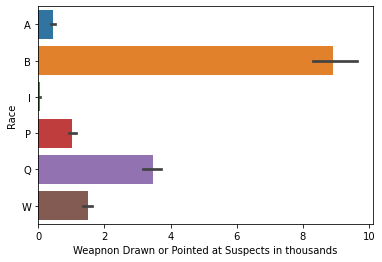

In [99]:
ax=sns.barplot(x='pf_weapn',y='race',data=df)
ax.set(xlabel="Weapnon Drawn or Pointed at Suspects in thousands", ylabel = "Race")


[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Suspects handcuffed by Police in thousands')]

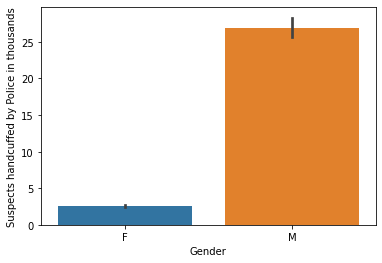

In [100]:
pic3 = sns.barplot(x='sex',y='pf_hcuff',data=c_df1)
pic3.set(xlabel="Gender", ylabel = "Suspects handcuffed by Police in thousands")

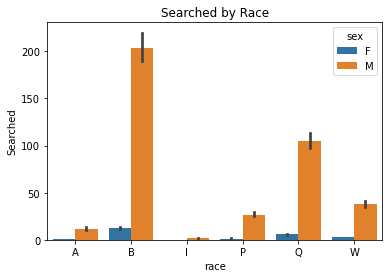

In [101]:
#Barplot of dataset
import seaborn as sns
import matplotlib.pyplot as plt
race_searched=sns.barplot(data=df, x="race", y="searched",hue="sex")
plt.title('Searched by Race')
plt.xlabel('race')
plt.ylabel('Searched')
plt.show()


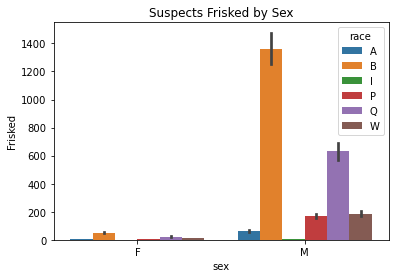

In [102]:
#Barplot of dataset
sns.barplot(data=df, x="sex", y="frisked",hue="race")
sex_frisked=plt.title('Suspects Frisked by Sex')
plt.xlabel('sex')
plt.ylabel('Frisked')
plt.show()

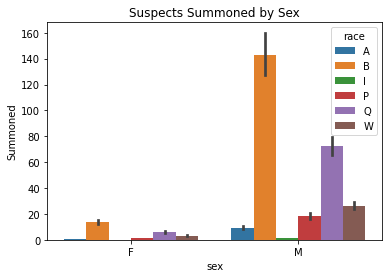

In [103]:
#Barplot of dataset
sns.barplot(data=df, x="sex", y="summoned",hue="race")
plt.title('Suspects Summoned by Sex')
plt.xlabel('sex')
plt.ylabel('Summoned')
plt.show()

Text(0.5, 1.0, 'Suspects caught with Contraband based on Sex')

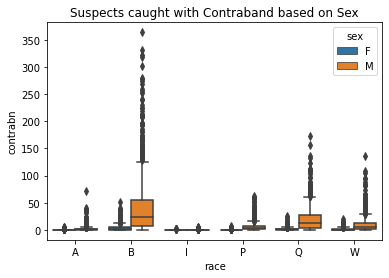

In [104]:
#Box Plot
sns.boxplot(x='race', y='contrabn', data=df, hue='sex')
plt.title("Suspects caught with Contraband based on Sex")

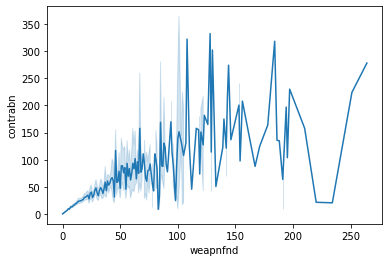

In [105]:
#Barplot of dataset
sns.lineplot(data=df, x="weapnfnd", y="contrabn")
plt.xlabel('weapnfnd')
plt.ylabel('contrabn')
plt.show()

### Predictive Models

### Linear Regression Model

In [106]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [107]:
utility.linear_model("totalnumsfincd", "pf_weapn","pf_hcuff",c_df1)

                            OLS Regression Results                            
Dep. Variable:                      a   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 2.611e+04
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:31:44   Log-Likelihood:                -98958.
No. Observations:               12012   AIC:                         1.979e+05
Df Residuals:                   12009   BIC:                         1.979e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -48.9708      8.923     -5.488      0.0

In [39]:
LinearModel = smf.ols(formula= "totalnumsfincd ~ pf_weapn + pf_hcuff", data=c_df1)
res=LinearModel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         totalnumsfincd   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 2.611e+04
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:28:04   Log-Likelihood:                -98958.
No. Observations:               12012   AIC:                         1.979e+05
Df Residuals:                   12009   BIC:                         1.979e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -48.9708      8.923     -5.488      0.0

In [108]:
corcoef = np.sqrt(0.815)
corcoef

0.9027735042633894

### Logistic Regression Model

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [110]:
ethnic = pd.get_dummies(c_df1['race'],drop_first=True)
ethnic.head()

,B,I,P,Q,W
0,0,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [111]:
gender = pd.get_dummies(c_df1['sex'],drop_first=True)
gender.head()

,M
0,0
1,0
2,0
3,0
4,0


In [112]:
c_df1 = pd.concat([c_df1,ethnic,gender],axis=1)
c_df1.head()

,year,pct,sex,race,stopped,arrested,frisked,searched,summoned,contrabn,...,rf_knowl,rf_furtv,rf_bulge,totalnumsfincd,B,I,P,Q,W,M
0,2003,1.0,F,A,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0,0,0,0,0,0
1,2003,1.0,F,B,11.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,1,0,0,0,0,0
2,2003,1.0,F,I,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
3,2003,1.0,F,P,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0
4,2003,1.0,F,Q,6.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0,0,0,1,0,0


In [113]:
c_df2 = copy.deepcopy(c_df1)
c_df2.drop(['year','pct','sex','race','pf_weapn','pf_hcuff','cs_objcs','cs_descr','cs_casng','cs_lkout',
            'cs_cloth','cs_drgtr','cs_furtv','cs_vcrim','cs_bulge',
           'rf_vcrim','rf_othsw','rf_attir','rf_vcact','rf_rfcmp','rf_verbl','rf_knowl',
           'rf_furtv','rf_bulge','totalnumsfincd'],axis=1,inplace=True)
c_df2.head()

,stopped,arrested,frisked,searched,summoned,contrabn,weapnfnd,B,I,P,Q,W,M
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0
1,11.0,2.0,2.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0


In [114]:
X = c_df2.drop("M",axis=1)
y = c_df2['M']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [116]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [118]:
X_train.shape


(8408, 12)

In [119]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [120]:
predictions = logmodel.predict(X_test)

In [121]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.75      0.97      0.85      1807\n           1       0.96      0.68      0.80      1797\n\n    accuracy                           0.83      3604\n   macro avg       0.86      0.83      0.82      3604\nweighted avg       0.86      0.83      0.82      3604\n'

In [122]:
confusion_matrix(y_test,predictions)

array([[1750,   57],
       [ 568, 1229]], dtype=int64)

In [123]:
accuracy_score(y_test,predictions)*100

82.6581576026637

### Decision Tree Model

In [124]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sn


In [125]:
c_df3= copy.deepcopy(df)
c_df3.head(10)

,year,pct,sex,race,stopped,arrested,frisked,searched,summoned,contrabn,...,cs_bulge,rf_vcrim,rf_othsw,rf_attir,rf_vcact,rf_rfcmp,rf_verbl,rf_knowl,rf_furtv,rf_bulge
0,2003,1.0,F,A,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003,1.0,F,B,11.0,2.0,2.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,1.0,F,I,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,1.0,F,P,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003,1.0,F,Q,6.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2003,1.0,F,W,5.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2003,1.0,M,A,26.0,0.0,9.0,3.0,1.0,0.0,...,0.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
7,2003,1.0,M,B,260.0,21.0,114.0,42.0,13.0,4.0,...,11.0,36.0,48.0,20.0,3.0,14.0,2.0,3.0,32.0,17.0
8,2003,1.0,M,I,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2003,1.0,M,P,29.0,5.0,9.0,4.0,0.0,1.0,...,2.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0


In [126]:
#Deleting Unused Columns
c_df3=df.drop([  'pf_weapn',
 'pf_hcuff',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'cs_cloth',
 'cs_drgtr',
 'cs_furtv',
 'cs_vcrim',
 'cs_bulge',
 'rf_vcrim',
 'rf_othsw',
 'rf_attir',
 'rf_vcact',
 'rf_rfcmp',
 'rf_verbl',
 'rf_knowl',
 'rf_furtv',
 'rf_bulge'],1)
c_df3.head()

,year,pct,sex,race,stopped,arrested,frisked,searched,summoned,contrabn,weapnfnd
0,2003,1.0,F,A,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2003,1.0,F,B,11.0,2.0,2.0,0.0,0.0,0.0,2.0
2,2003,1.0,F,I,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,1.0,F,P,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003,1.0,F,Q,6.0,1.0,1.0,0.0,0.0,0.0,0.0


In [127]:
c_df3["totalnumsfincd"] = c_df3["stopped"]+c_df3["arrested"]+c_df3["frisked"]+c_df3["searched"]
+c_df3["summoned"]+c_df3["contrabn"]+c_df3["weapnfnd"]
c_df3.head()

,year,pct,sex,race,stopped,arrested,frisked,searched,summoned,contrabn,weapnfnd,totalnumsfincd
0,2003,1.0,F,A,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
1,2003,1.0,F,B,11.0,2.0,2.0,0.0,0.0,0.0,2.0,15.0
2,2003,1.0,F,I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,1.0,F,P,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2003,1.0,F,Q,6.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0


### Transforming the Character Variables to numeric and creating duplicate columns for "Sex" & "Race" 

In [128]:
#creating new lables for the below columns
#RACE-A-0,B-1,I-2,P-3,Q-4,W-5
le_sex = LabelEncoder()
le_race = LabelEncoder()
c_df3['sex_n'] = le_sex.fit_transform(c_df3['sex'])
c_df3['race_n'] = le_sex.fit_transform(c_df3['race'])
c_df3

,year,pct,sex,race,stopped,arrested,frisked,searched,summoned,contrabn,weapnfnd,totalnumsfincd,sex_n,race_n
0,2003,1.0,F,A,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0,0
1,2003,1.0,F,B,11.0,2.0,2.0,0.0,0.0,0.0,2.0,15.0,0,1
2,2003,1.0,F,I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
3,2003,1.0,F,P,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
4,2003,1.0,F,Q,6.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,2015,123.0,M,B,21.0,5.0,10.0,2.0,1.0,0.0,0.0,38.0,1,1
12008,2015,123.0,M,I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
12009,2015,123.0,M,P,4.0,2.0,3.0,3.0,0.0,1.0,1.0,12.0,1,3
12010,2015,123.0,M,Q,11.0,2.0,6.0,0.0,1.0,0.0,0.0,19.0,1,4


### Column "sex" is numerically categorized as "sex_n"
### Male = 1, Female = 0
### Column "race" is numerically categorized as "race_n"
### 0 : "Asian and Pacific Islander"
### 1 : "Black or African-Americans"
### 2 : "American Indians or Alaskan Natives"
### 3 : "White-Hispanic"
### 4 : "Black-Hispanic"
### 5 : "White"

In [129]:
c_df3.pop('pct')

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
         ...  
12007    123.0
12008    123.0
12009    123.0
12010    123.0
12011    123.0
Name: pct, Length: 12012, dtype: float64

In [130]:
c_df3.pop('sex')

0        F
1        F
2        F
3        F
4        F
        ..
12007    M
12008    M
12009    M
12010    M
12011    M
Name: sex, Length: 12012, dtype: object

In [131]:
c_df3.pop('race')

0        A
1        B
2        I
3        P
4        Q
        ..
12007    B
12008    I
12009    P
12010    Q
12011    W
Name: race, Length: 12012, dtype: object

In [132]:
c_df3.pop('searched')

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
12007     2.0
12008     0.0
12009     3.0
12010     0.0
12011    16.0
Name: searched, Length: 12012, dtype: float64

In [133]:
c_df3.head(10)

,year,stopped,arrested,frisked,summoned,contrabn,weapnfnd,totalnumsfincd,sex_n,race_n
0,2003,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0,0
1,2003,11.0,2.0,2.0,0.0,0.0,2.0,15.0,0,1
2,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
3,2003,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
4,2003,6.0,1.0,1.0,0.0,0.0,0.0,8.0,0,4
5,2003,5.0,1.0,1.0,0.0,0.0,1.0,8.0,0,5
6,2003,26.0,0.0,9.0,1.0,0.0,0.0,38.0,1,0
7,2003,260.0,21.0,114.0,13.0,4.0,12.0,437.0,1,1
8,2003,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
9,2003,29.0,5.0,9.0,0.0,1.0,3.0,47.0,1,3


In [134]:
def data_importing():
    c_df3
    # Printing the dataset shape
    print ("Length of the Data: ", len(c_df3))
    print ("Shape of the Data: ", c_df3.shape)
      
    # Printing the dataset obseravtions
    print ("Dataset: ",c_df3.head())
    return c_df3

In [136]:
# Function to split the dataset
def splitting_data(c_df3):
  
    # Separating the target variable
    X = c_df3.values[:,1:8]
    Y = c_df3.values[:,9:10]
  
    # Splitting the dataset into train and test
    X_train, X_test, Y_train, Y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, Y_train, Y_test
      

In [137]:
# Function to perform training with giniIndex.
def gini_training(X_train, X_test, Y_train):
  
    # Creating the classifier object
    tree_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    tree_gini.fit(X_train, y_train)
    return tree_gini

In [138]:
# Function to perform training with entropy.
def entropy_training(X_train, X_test, Y_train):
  
    # Decision tree with entropy
    tree_entr = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    tree_entr.fit(X_train, Y_train)
    return tree_entr

In [139]:
# Function to make predictions
def predicting_data(X_test, tree_obj):
  
    # Predicton on test with giniIndex
    Y_pred = tree_obj.predict(X_test)
    print("Predicted values:\n")
    print(Y_pred)
    return Y_pred

In [140]:
# Function to calculate accuracy
def accuracy_calculation(Y_test, Y_pred):
      
    print("Confusion Matrix:\n ",
        confusion_matrix(Y_test, Y_pred))
    print("\n")

    print ("Accuracy : \n",
    accuracy_score(Y_test,Y_pred)*100)
    print("\n")

    print("Report :\n ",
    classification_report(Y_test, Y_pred))
    print("\n")


In [141]:
def main_func():
    # Building Phase
    data = data_importing()
    X, Y, X_train, X_test, Y_train, Y_test = splitting_data(data)
    tree_gini = gini_training(X_train, X_test, Y_train)
    tree_entr = entropy_training(X_train, X_test, Y_train)
      
    # Operational Phase
    print("Results Using Gini Index:\n")
  
    # Prediction using gini
    Y_pred_gini = predicting_data(X_test, tree_gini)
    accuracy_calculation(Y_test, Y_pred_gini)
      
    print("Results Using Entropy:\n")

    # Prediction using entropy
    Y_pred_entropy = predicting_data(X_test, tree_entr)
    accuracy_calculation(Y_test, Y_pred_entropy)
      
      


In [142]:
# Calling main function
if __name__=="__main__":
    main_func()

Length of the Data:  12012
Shape of the Data:  (12012, 10)
Dataset:     year  stopped  arrested  frisked  summoned  contrabn  weapnfnd  \
0  2003      1.0       0.0      1.0       0.0       0.0       0.0   
1  2003     11.0       2.0      2.0       0.0       0.0       2.0   
2  2003      0.0       0.0      0.0       0.0       0.0       0.0   
3  2003      1.0       0.0      0.0       0.0       0.0       0.0   
4  2003      6.0       1.0      1.0       0.0       0.0       0.0   

   totalnumsfincd  sex_n  race_n  
0             3.0      0       0  
1            15.0      0       1  
2             0.0      0       2  
3             1.0      0       3  
4             8.0      0       4  
Results Using Gini Index:

Predicted values:

[0 0 0 ... 1 0 0]
Confusion Matrix:
  [[564   8   0   0   0   0]
 [464 142   0   0   0   0]
 [583   0   0   0   0   0]
 [611  27   0   0   0   0]
 [520  97   0   0   0   0]
 [564  24   0   0   0   0]]


Accuracy : 
 19.589345172031077


Report :
              

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

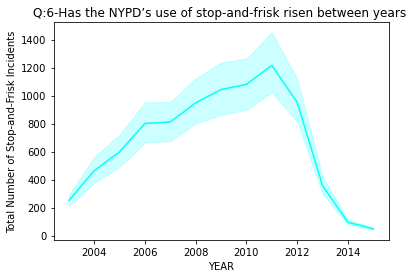

In [143]:
#Barplot of dataset
#Question-6
sns.lineplot(data=c_df3, x="year", y="totalnumsfincd",color='cyan')
plt.title('Q:6-Has the NYPD’s use of stop-and-frisk risen between years ')
plt.xlabel('YEAR')
plt.ylabel('Total Number of Stop-and-Frisk Incidents')
plt.show()

In [144]:
Q7=c_df3.groupby(['race_n'])[['stopped']].sum().reset_index()
Q7

,race_n,stopped
0,0,154316.0
1,1,2598217.0
2,2,19584.0
3,3,306232.0
4,4,1218049.0
5,5,496939.0


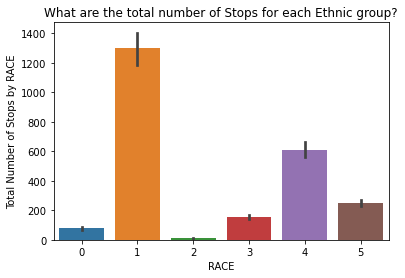

In [146]:
#Question-7
Q7=c_df3.groupby(['race_n'])[['stopped']].sum().reset_index()
Q7
sns.barplot(data=c_df3, x="race_n", y="stopped")
plt.title('What are the total number of Stops for each Ethnic group?')
plt.xlabel('RACE')
plt.ylabel('Total Number of Stops by RACE')
plt.show()

### References

In [30]:
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://www.youtube.com/watch?v=VCJdg7YBbAQ&ab_channel=edureka%21